<a href="https://colab.research.google.com/github/NexBorn/Proyecto-WordCloud/blob/master/WordCloudUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Porfavor espere cargando archivos necesarios!

 1.- Ingresar link del usuario.
 2.- Ingresar ID del usuario.
 3.- Salir
1
Ingrese el link
https://es.stackoverflow.com/users/10398/jhoubert-rincon?tab=tags
Link valido
Generando...

 Selecciona una forma del wordcloud
 1.- Corazon
 2.- Mapa
 3.- Nube
 4.- Triangulo
2
Completado...


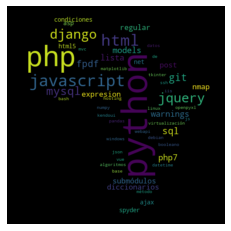


 1.- Ingresar link del usuario.
 2.- Ingresar ID del usuario.
 3.- Salir
1
Ingrese el link
https://es.stackoverflow.com/users/10398/jhoubert-rincon?tab=tags


In [ ]:
import numpy as np
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import validators # Si da error aqui es porque no esta instalado el paquete. Para instalarlo ingresar esto !pip install validators

print("Porfavor espere cargando archivos necesarios!")

! wget -O corazon.jpg https://www.dropbox.com/s/8pvtxt2o9de60jm/corazon.jpg?dl=0 >/dev/null 2>&1
! wget -O triangulo.jpg https://www.dropbox.com/s/e0nlk09chxvmqej/triangulo.jpg?dl=0 >/dev/null 2>&1
! wget -O Mapa.jpg https://www.dropbox.com/s/uzs080yefiz1fet/mapa.jpeg?dl=0 >/dev/null 2>&1
! wget -O nube.jpg https://www.dropbox.com/s/m3l6pkbnccssg6e/nube.jpg?dl=0 >/dev/null 2>&1

def toMask(list):
    print("\n Selecciona una forma del wordcloud"
          "\n 1.- Corazon"
          "\n 2.- Mapa"
          "\n 3.- Nube"
          "\n 4.- Triangulo")
    op = validaint()
    
    if op == 1:
        generatewc2(list, "/content/corazon.jpg")
    elif op == 2:
        generatewc2(list, "/content/Mapa.jpg")
    elif op == 3:
        generatewc2(list, "/content/nube.jpg")
    elif op == 4:
        generatewc2(list, "/content/triangulo.jpg")
    else:
        print("Error elige una opcion correcta")


def menu():
    op = False
    while not op:

        print("\n 1.- Ingresar link del usuario."
              "\n 2.- Ingresar ID del usuario."
              "\n 3.- Salir")

        item = validaint()

        if item == 1:
            toMask(case1())
        elif item == 2:
            toMask(case2())
        elif item == 3:
            op = True
        else:
            print("Error elige una opcion correcta")


def case1():
    print("Ingrese el link")
    op = False
    while not op:
        url = input()
        
        if validators.url(url):
            print("Link valido")
            op = True
        else:
            print("Link invalido")


    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    eq = soup.find_all("td")

    lista = list()

    completelist = list()

    netiquetas = list()

    for i in eq:
        lista.append(i.find("a", class_="post-tag").text)

    for i in eq:
        netiquetas.append(i.find("div", class_="answer-votes").text)
    print("Generando...")
    for j in range(len(lista)):
        for k in range(int(netiquetas[j])):
            completelist.append(lista[j])

    return completelist


def case2():
    print("Ingrese el ID")

    id = str(validaint())

    url1 = "https://es.stackoverflow.com/users/" + id + "/?tab=tags"

    print(url1)

    page1 = requests.get(url1)

    soup = BeautifulSoup(page1.content, 'html.parser')

    eq = soup.find_all("td")

    lista = list()

    completelist = list()

    netiquetas = list()

    for i in eq:
        lista.append(i.find("a", class_="post-tag").text)

    for i in eq:
        netiquetas.append(i.find("div", class_="answer-votes").text)

    for j in range(len(lista)):
        for k in range(int(netiquetas[j])):
            completelist.append(lista[j])

    return completelist


def generatewc2(list, mas):
    mask = np.array(Image.open(mas))
    try:
        wc = WordCloud(mask=mask, background_color="Black", collocations=False).generate(' '.join(list))

    except:

        print("Error! por favor ingresa correctamente el link de stackoverflow o el ID ")
        return

    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    print("Completado...")
    plt.show()


def validaint():
    flag = False
    while not flag:
        try:
            num1 = int(input())
            flag = True
            return num1
        except:
            print("Error! por favor ingresa un entero")


menu()

In [ ]:

!pip install validators
